In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

없앨 칼럼
id
listing_url
scrape_id
last_scraped
[0]~[3]

name
description
[5, 6]

8 picture_url
9 host_id
10 host_url
11 host_name

19  host_thumbnail_url                            24342 non-null  object 
20  host_picture_url                              24342 non-null  object 
21  host_neighbourhood                            6874 non-null   object

49  calendar_updated                              0 non-null      float64



애매or이게뭐지

4 source
7 neighborhood_overview

12 host_since
결측치 2천?

13 host_location
14 host_about (자기소개)
결측치 절반 정도

15 host_response_time
16 host_response_rate
17 host_acceptance_rate

22  host_listings_count                           24342 non-null  float64
23  host_total_listings_count                     24342 non-null  float64
24  host_verifications                            24342 non-null  object 
25  host_has_profile_pic                          24342 non-null  object

27  neighbourhood                                 14048 non-null  object 
28  neighbourhood_cleansed                        25297 non-null  object 
29  neighbourhood_group_cleansed                  0 non-null      float64

41  minimum_nights                                25297 non-null  int64  
42  maximum_nights                                25297 non-null  int64  
43  minimum_minimum_nights                        25284 non-null  float64
44  maximum_minimum_nights                        25284 non-null  float64
45  minimum_maximum_nights                        25284 non-null  float64
46  maximum_maximum_nights                        25284 non-null  float64
47  minimum_nights_avg_ntm                        25297 non-null  float64
48  maximum_nights_avg_ntm                        25297 non-null  float64

50  has_availability                              25186 non-null  object 
51  availability_30                               25297 non-null  int64  
52  availability_60                               25297 non-null  int64  
53  availability_90                               25297 non-null  int64  
54  availability_365                              25297 non-null  int64  
55  calendar_last_scraped                         25297 non-null  object 
56  number_of_reviews                             25297 non-null  int64  
57  number_of_reviews_ltm                         25297 non-null  int64  
58  number_of_reviews_l30d                        25297 non-null  int64  
59  availability_eoy                              25297 non-null  int64  
60  number_of_reviews_ly                          25297 non-null  int64  
61  estimated_occupancy_l365d                     25297 non-null  int64  
62  estimated_revenue_l365d                       23260 non-null  float64
63  first_review                                  21724 non-null  object 
64  last_review                                   21724 non-null  object 
65  review_scores_rating                          21724 non-null  float64
66  review_scores_accuracy                        21720 non-null  float64
67  review_scores_cleanliness                     21720 non-null  float64
68  review_scores_checkin                         21720 non-null  float64
69  review_scores_communication                   21720 non-null  float64
70  review_scores_location                        21720 non-null  float64
71  review_scores_value                           21720 non-null  float64
72  license                                       25278 non-null  object 
73  instant_bookable                              25297 non-null  object

74  calculated_host_listings_count                25297 non-null  int64  
75  calculated_host_listings_count_entire_homes   25297 non-null  int64  
76  calculated_host_listings_count_private_rooms  25297 non-null  int64  
77  calculated_host_listings_count_shared_rooms   25297 non-null  int64  
78  reviews_per_month                             21724 non-null  float64


무조건 keep
18 host_is_superhost
결측치 2천

26 host_identity_verified 24342

30  latitude                                      25297 non-null  float64
31  longitude                                     25297 non-null  float64
경도 위도

32  property_type                                 25297 non-null  object 
33  room_type                                     25297 non-null  object 
34  accommodates                                  25297 non-null  int64  
35  bathrooms                                     23253 non-null  float64
36  bathrooms_text                                25251 non-null  object 
37  bedrooms                                      25040 non-null  float64
38  beds                                          23255 non-null  float64
39  amenities                                     25297 non-null  object 
40  price                                         23260 non-null  object

In [12]:
df = pd.read_csv('listings.csv.gz', compression='gzip')
# df.head()
# df.info()

df_need = df.iloc[:, 32:41]
df_need.head()

,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price
0,Entire rental unit,Entire home/apt,3,1.0,1 bath,0.0,2.0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00"
1,Entire rental unit,Entire home/apt,8,1.0,1 bath,2.0,5.0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00"
2,Entire serviced apartment,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Room-darkening shades"", ""Body soap"", ""Carbon...","$14,550.00"
3,Entire home,Entire home/apt,8,1.0,1 bath,3.0,6.0,"[""Room-darkening shades"", ""Cooking basics"", ""C...","$22,012.00"
4,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Clothing storage: closet"", ""Elevator"", ""Hair...","$15,429.00"


In [24]:
columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price']
f_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

df_need['property_type'].unique() #65
df_need['room_type'].unique() #4 -> label encoding!

array(['Entire home/apt', 'Shared room', 'Private room', 'Hotel room'],
      dtype=object)

In [26]:
df_need.describe()

,accommodates,bathrooms,bedrooms,beds,price
count,25297.000000,23253.000000,25040.000000,23255.000000,2.326000e+04
mean,4.418824,1.156453,1.406350,2.935068,2.141819e+04
std,2.927961,0.541552,1.072037,2.330206,8.393381e+04
min,1.000000,0.000000,0.000000,0.000000,1.700000e+03
25%,2.000000,1.000000,1.000000,1.000000,9.463000e+03
50%,4.000000,1.000000,1.000000,2.000000,1.400000e+04
75%,6.000000,1.000000,2.000000,4.000000,2.190375e+04
max,16.000000,19.500000,50.000000,50.000000,8.711110e+06


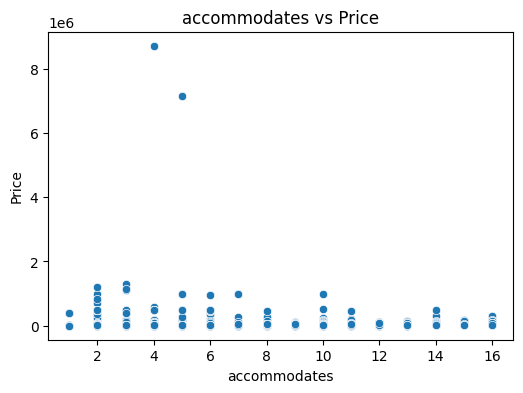

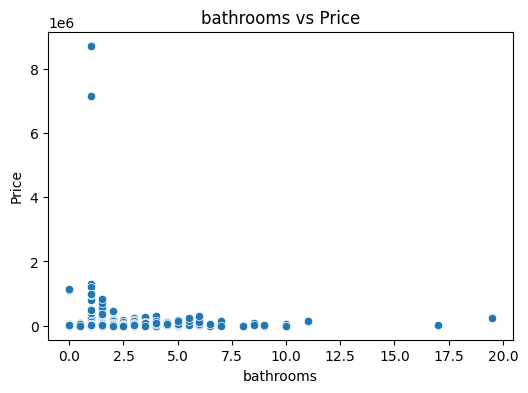

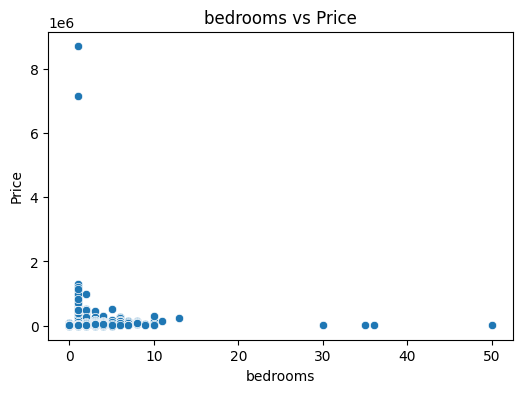

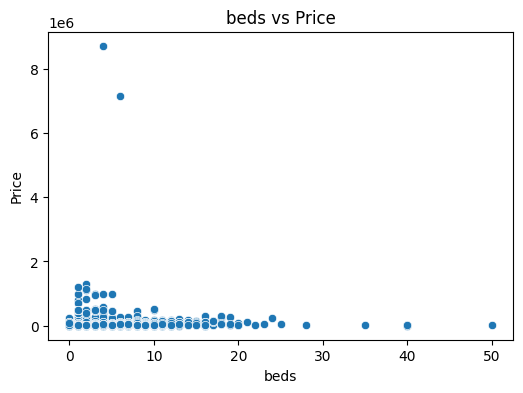

In [ ]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_need, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

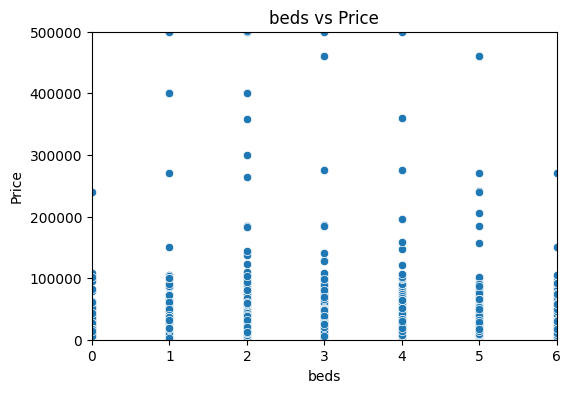

In [ ]:
# 침대 수에 따른 가격
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_need, x='beds', y='price')
plt.title('beds vs Price')
plt.xlabel('beds')
plt.ylabel('Price')
plt.xlim(0, 6)
plt.ylim(0, 500000)
plt.show()

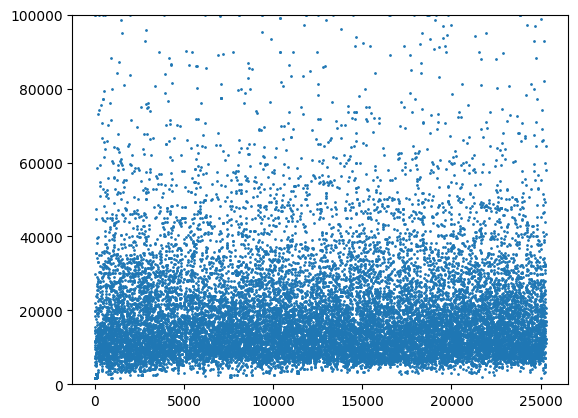

In [ ]:
df_need['price'] = (
    df_need['price']
    .astype(str)
    .str.replace(r'[$,]', '', regex=True)
    .astype(float)
)

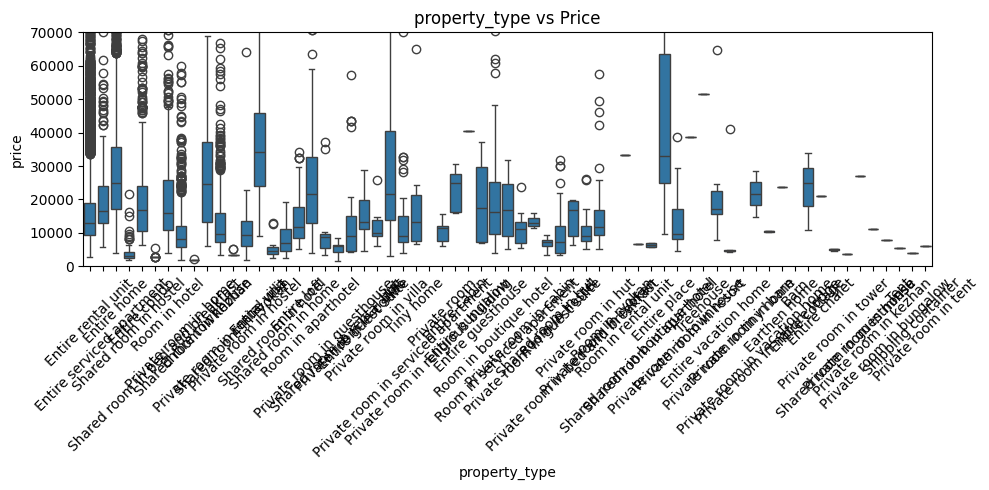

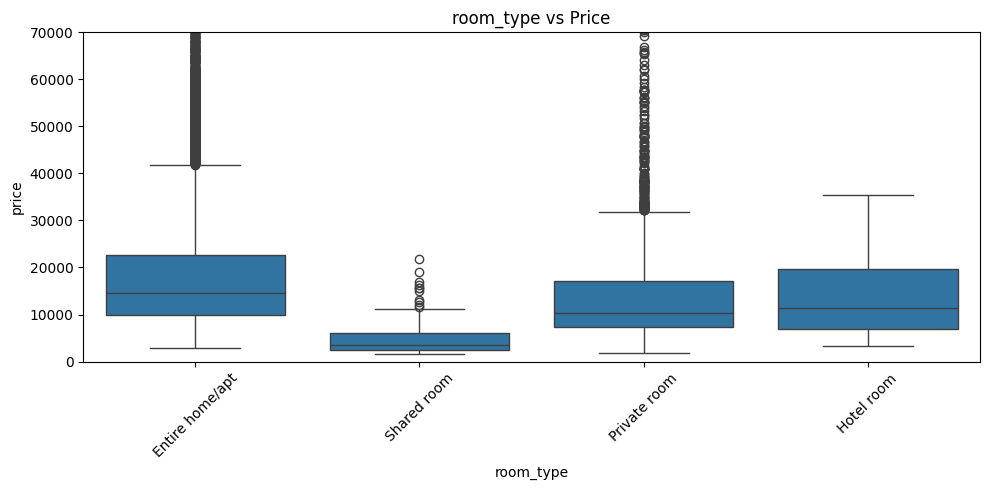

In [ ]:
for col in ['property_type', 'room_type']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_need, x=col, y='price')
    plt.xticks(rotation=45)
    plt.ylim(0, 70000)
    plt.title(f'{col} vs Price')
    plt.tight_layout()
    plt.show()

# apt 다양.. share room은 확연히 낮은 가격............

In [69]:
df_apt = df[df['room_type']=='Entire home/apt']

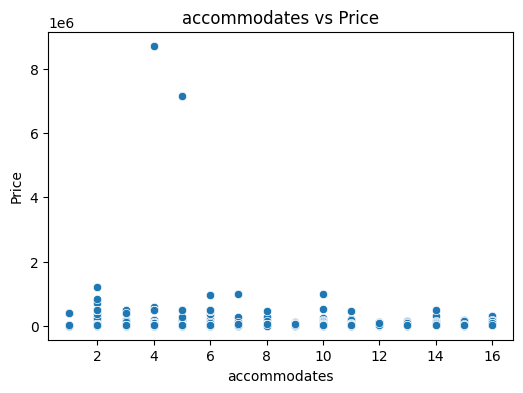

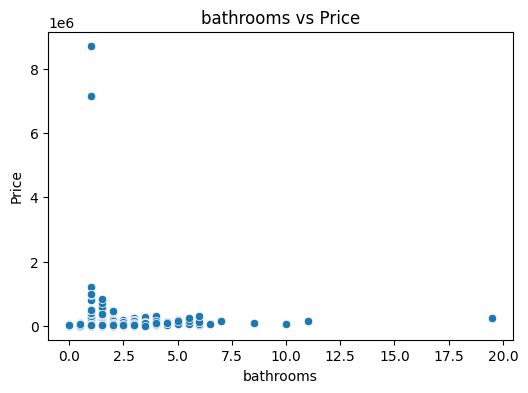

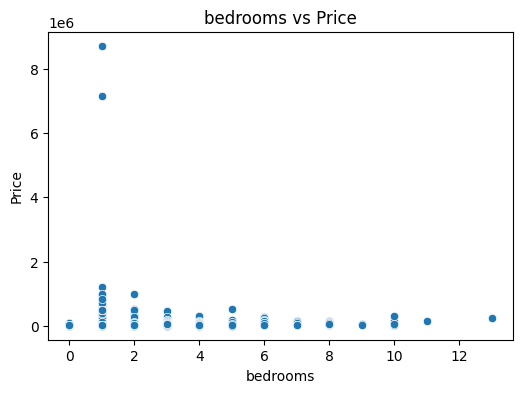

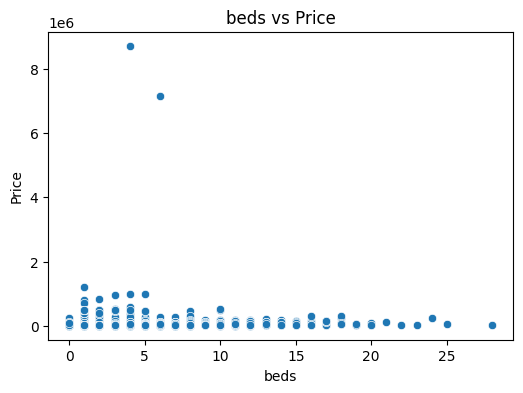

In [67]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_apt, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

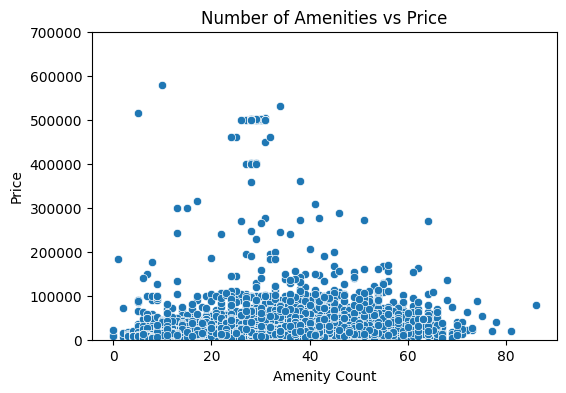

In [ ]:
# amenities 수 파악해서 price와 관계

df_need['amenity_count'] = df_need['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_need, x='amenity_count', y='price')
plt.title("Number of Amenities vs Price")
plt.xlabel("Amenity Count")
plt.ylabel("Price")
plt.ylim(0, 700000)
plt.show()
# 고르게 분포를 함 . . . . .................................... 어매니티가 몇 개든............ 고르게...

In [ ]:
tokyo_met = pd.read_csv('listings.csv')
tokyo_met.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1034638294163485758,1K/6 min.walk from Korakuen Station/202,507235651,Sumyca,NaN,Bunkyo Ku,35.706170,139.745120,Entire home/apt,100000.0,30,0,NaN,NaN,74,251,0,M130033302
1,1034640917459370080,Near Tokyo Dome/6 min. walk from Korakuen/d01,507235651,Sumyca,NaN,Bunkyo Ku,35.706254,139.745134,Entire home/apt,100000.0,30,0,NaN,NaN,74,237,0,M130033307
2,1034643225542448999,"QY31 JR Train station 5-min walk, airport dire...",279064316,Na,NaN,Taito Ku,35.698540,139.780864,Entire home/apt,14550.0,1,24,2025-04-19,1.26,38,261,11,M130019202
3,1034682682318099944,温馨和风民宿/最大8人/独享一户建/近车站/免费WiFi/近公园神社,512010614,寧月,NaN,Kita Ku,35.755420,139.732600,Entire home/apt,22012.0,2,15,2025-06-08,0.84,1,257,12,M130036504
4,1034886759303593464,"10min to SkyTree,Asakusa/Direct access to Airport",149643001,Sylvia,NaN,Sumida Ku,35.715503,139.808758,Entire home/apt,15429.0,5,17,2025-06-07,0.92,22,130,8,M130037086


In [62]:
max_price = df['price'].max()

# 그 값을 가진 행 제거
df = df[df['price'] != max_price]

In [63]:
df['price'].describe()

count    2.325600e+04
mean     2.063233e+04
std      3.848301e+04
min      1.700000e+03
25%      9.463000e+03
50%      1.400000e+04
75%      2.189300e+04
max      1.142154e+06
Name: price, dtype: float64

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19360\3021131188.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


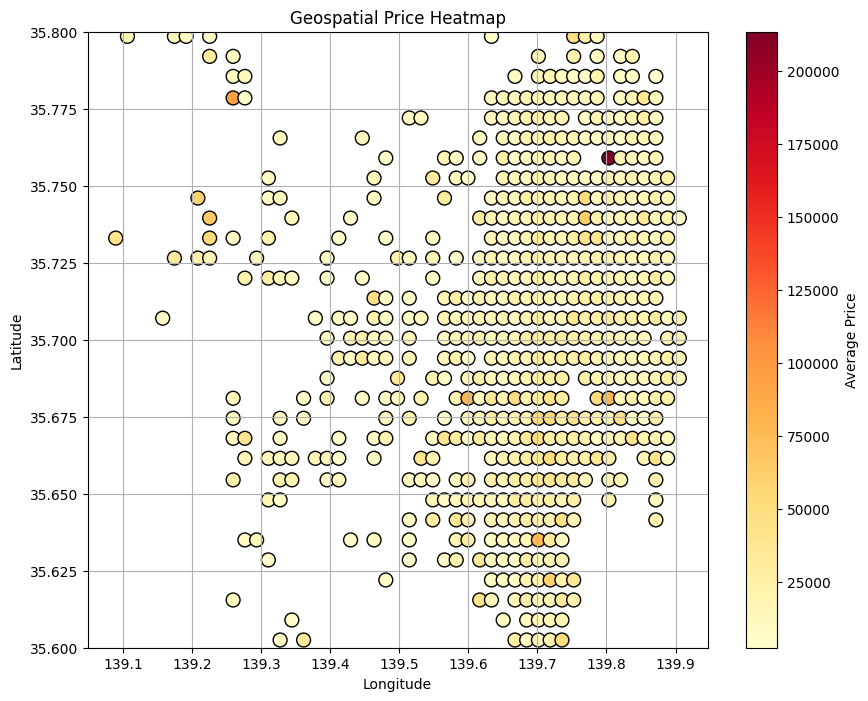

In [64]:
# 위도 경도에 따른 가격 변화~ 극적이지 않음~

# df['price'] = (
#     df['price']
#     .astype(str)  # 혹시 숫자가 아닌 경우 대비
#     .str.replace(r'[$,]', '', regex=True)  # $, , 제거
#     .astype(float)  # float으로 변환
# )

# 결측치 제거 (위도/경도/가격)
df_geo = df[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 50)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(35.6, 35.8)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19360\4047902215.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


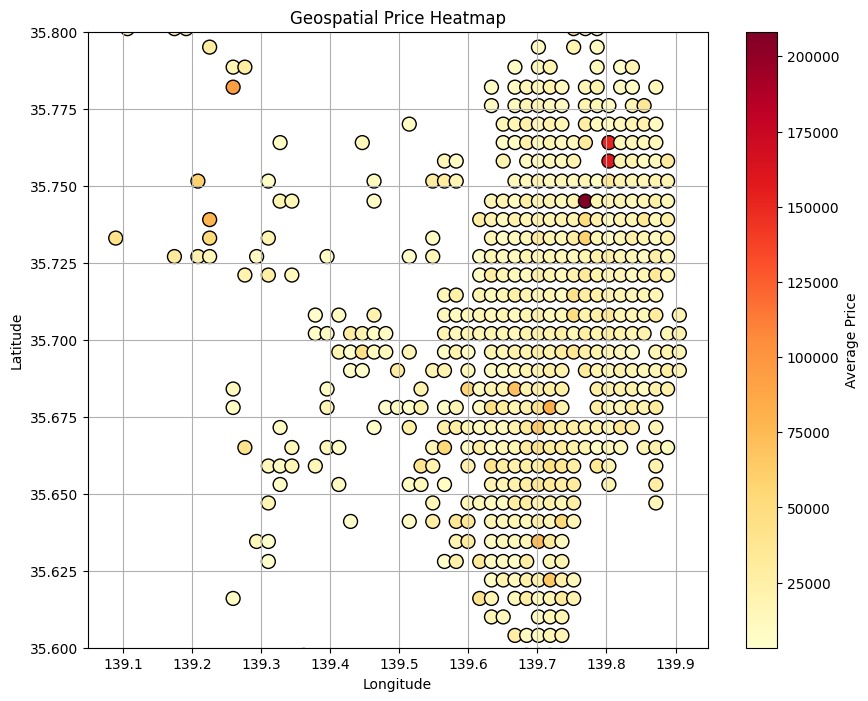

In [72]:
# 위도 경도에 따른 가격 변화~ APT~

# df['price'] = (
#     df['price']
#     .astype(str)  # 혹시 숫자가 아닌 경우 대비
#     .str.replace(r'[$,]', '', regex=True)  # $, , 제거
#     .astype(float)  # float으로 변환
# )

# 결측치 제거 (위도/경도/가격)
df_geo = df_apt[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 50)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(35.6, 35.8)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()

In [ ]:
# 다른 자료 찾기. . .